# Seminario de Ciencia de Datos

## 2º Cuatrimestre de 2017

## Módulo 4 - Redes

### Integrantes:

- Mascitti, Julio Augusto - 954/11 - mascittija@gmail.com

- Aleman, Damián - 377/10 - damianaleman@gmail.com

- Guerson, Matias Carlos - 925/10 - matias.guerson@gmail.com

#### Introducción

En este trabajo práctico vamos a analizar una red de coautorías de publicaciones de Física de altas energías. Para eso la catedra nos provee de un archivo con publicaciones y sus autores. Del cual tenemos que extraer la información de coautrias y trabajar sobre la representación de la misma a traves de un grafo.


In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import itertools as it
import networkx as nx
import random
import operator
import warnings
warnings.filterwarnings('ignore')

1)

In [29]:
def analizar_grafo(grafo):

    
    print("Cantidad de nodos: {0}".format(grafo.number_of_nodes()))
    print("Cantidad de aristas: {0}".format(grafo.number_of_edges()))
    
    """
    print("Cantidad de componentes conexas: ", len(componentes_conexas))
    print("Cantidad de nodos de la componente conexa gigante: ", tupla_componente_gigante[1])
    
    G = grafo.subgraph(tupla_componente_gigante[0])
    
    print("Segunda Componente :")
    segunda = grafo.copy()
    segunda.remove_nodes_from(G)
    if segunda.number_of_nodes() > 0 :
        componentes_conexas = [x for x in nx.connected_components(segunda)]
        tupla_componente_gigante = max([(x, len(x)) for x in componentes_conexas], key=lambda x:x[1])

        print("Cantidad de nodos: {0}".format(segunda.number_of_nodes()))
        print("Cantidad de aristas: {0}".format(segunda.number_of_edges()))
        print("Cantidad de componentes conexas: ", len(componentes_conexas))
        print("Cantidad de nodos de la componente conexa gigante: ", tupla_componente_gigante[1])
    
    return G
    """

In [30]:
def calcular_componentes_conexas_ordenadas(grafo):
    componentes_conexas = [x for x in nx.connected_components(grafo)]
    return sorted([(x, len(x)) for x in componentes_conexas], key=lambda x:x[1], reverse=True)

def calcular_componente_conexa_gigante(grafo):
    return grafo.subgraph((calcular_componentes_conexas_ordenadas(grafo)[0])[0])

def calcular_componente_conexa_iesima(grafo,i):
    return grafo.subgraph((calcular_componentes_conexas_ordenadas(grafo)[i])[0])

In [31]:
G = nx.Graph()

with open('./data.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        autores = [autor.strip() for autor in row[3].split('&')]
        coautorias = it.combinations(autores, 2)
        G.add_edges_from(coautorias)


In [32]:
analizar_grafo(G)

Cantidad de nodos: 3698
Cantidad de aristas: 7880


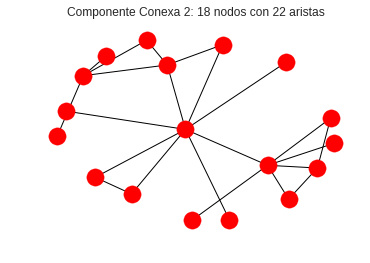

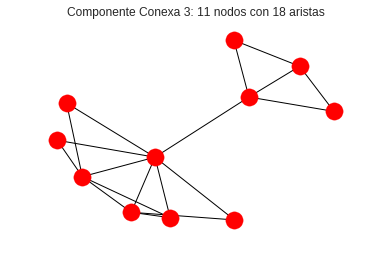

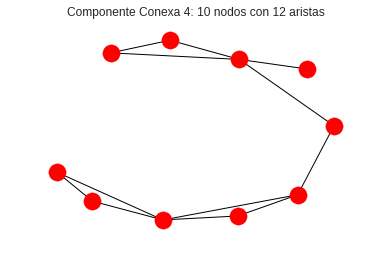

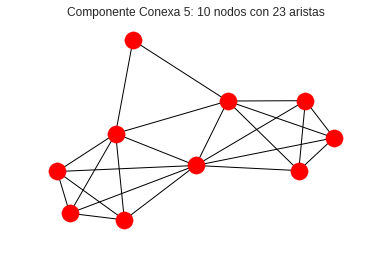

In [33]:
# Elegimos plotear desde la segunda componente conexa hasta la n
n = 10
componentes_conexas_ordenadas = calcular_componentes_conexas_ordenadas(G)
for i in range(1,n):
    grafo = G.subgraph(componentes_conexas_ordenadas[i][0])
    plt.figure()
    plt.title("Componente Conexa {0}: {1} nodos con {2} aristas".format(i+1, grafo.number_of_nodes(), grafo.number_of_edges()))
    nx.draw(grafo)

2)

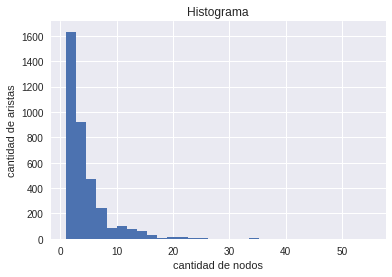

In [34]:
grados = list(nx.degree(G).values())
dist, bins, patches = plt.hist(grados, bins=30)
plt.title("Histograma")
plt.xlabel("cantidad de nodos")
plt.ylabel("cantidad de aristas")
plt.show()


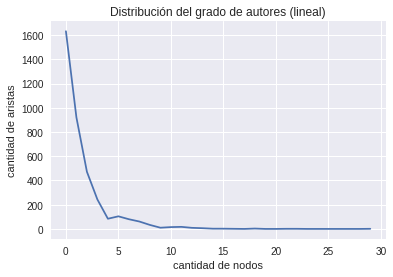

In [35]:
plt.title("Distribución del grado de autores (lineal)")
plt.xlabel("cantidad de nodos")
plt.ylabel("cantidad de aristas")
plt.plot(dist)

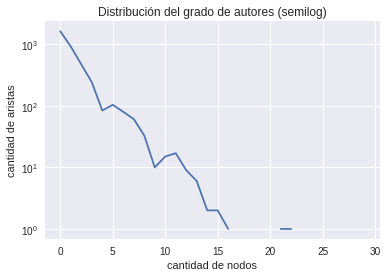

In [36]:
plt.title("Distribución del grado de autores (semilog)")
plt.xlabel("cantidad de nodos")
plt.ylabel("cantidad de aristas")
plt.semilogy(dist)

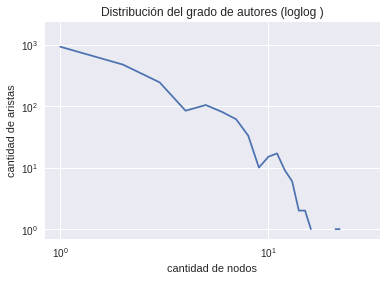

In [37]:
plt.title("Distribución del grado de autores (loglog )")
plt.xlabel("cantidad de nodos")
plt.ylabel("cantidad de aristas")
plt.loglog(dist)

Podemos observar que al graficar la distribución en escala semilog obtenemos un gráfico que se asemeja mucho más a uno lineal que al graficarla con la escala loglog, por lo tanto pareciera ser que se trata de una distribución exponencial.

3)

In [38]:
componente_conexa_gigante = G.subgraph(componentes_conexas_ordenadas[0][0])

print("cantidad de componentes conexas: ", len(componentes_conexas_ordenadas))
analizar_grafo(componente_conexa_gigante)

cantidad de componentes conexas:  236
Cantidad de nodos: 3018
Cantidad de aristas: 7269


4)

In [39]:
def invert_map(map):
    inv_map = {}
    for k, v in map.items():
        inv_map.setdefault(v, [])
        inv_map[v].append(k)
    return inv_map

def authors_by_distance(componente_gigante):
    nodo_raiz_idx = random.randint(0, len(componente_gigante) - 1)
    nodo_raiz = componente_gigante.nodes()[nodo_raiz_idx]

    paths = invert_map(all_distances[nodo_raiz])
    diferencial = {}
    
    previous_quantity = 0
    for distance in sorted(paths.keys()):
        diferencial[distance] = len(paths[distance]) 
        
    return diferencial

In [40]:
all_distances = nx.all_pairs_shortest_path_length(componente_conexa_gigante)

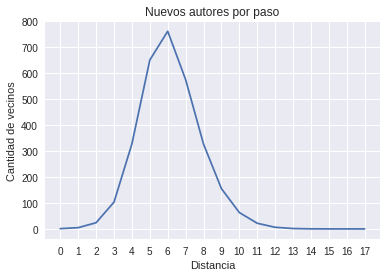

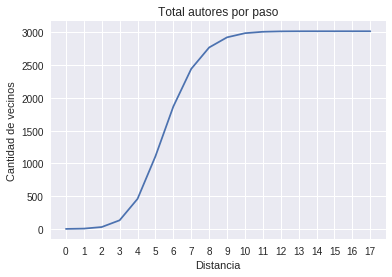

In [41]:
iterations = 2000
longest_path = max([max(node_distances.values()) for node_distances in all_distances.values()]) + 1
results = np.zeros((iterations, longest_path), dtype=int)

for iteration in range(iterations):
    diferencial = authors_by_distance(componente_conexa_gigante)
    
    for distance, quantity in diferencial.items():
        results[iteration, distance] = quantity

diferencial_means = results.mean(axis=0)
incremental_means = []

previous_quantity = 0
for quantity in diferencial_means:
    incremental_means.append(quantity + previous_quantity)
    previous_quantity = quantity + previous_quantity

def plot(y, title):
    sns.plt.figure()
    sns.plt.title(title)
    sns.plt.ylabel("Cantidad de vecinos")
    sns.plt.xlabel("Distancia")
    sns.plt.xticks(range(longest_path+1))
    sns.plt.plot(range(longest_path),y)

plot(diferencial_means, "Nuevos autores por paso")
plot(incremental_means, "Total autores por paso")

In [42]:
max_diferencial_index = np.argmax(diferencial_means)
print("A los {0} nodos de distancia se encuentra la mayor cantidad de vecinos agregados: {1}" \
     .format(max_diferencial_index, diferencial_means[max_diferencial_index]))

A los 6 nodos de distancia se encuentra la mayor cantidad de vecinos agregados: 760.26


Para este punto tomamos un nodo al azar de la mayor componente conexa y calculamos cuantos nodos se iban agregando mientras nos alejabamos de a un paso, y cuantos vecinos en total en cada paso dispone el nodo elegido.

Este experimento lo realizamos una gran cantidad de iteraciones y graficamos el promedio de todos los valores para ganar mayor robustez en el resultado.

Como podemos observar, claramente es a los 6 grados de distancia cuando se agrega la mayor cantidad de vecinos. A partir de allí, decrementa la cantidad de vecinos que se suman.

5)

In [43]:
clustering = nx.average_clustering(componente_conexa_gigante)
avg_shortest_path_length = nx.average_shortest_path_length(componente_conexa_gigante)

degrees_seq = list(dict(componente_conexa_gigante.degree()).values())
# Hago un grafo aleatorio con la distribución de grados
GR = nx.configuration_model(degrees_seq, create_using=nx.Graph())


#Me quedo con la componente conexa más grande del grafo aleatoreo
componente_conexa_gigante_GR = calcular_componente_conexa_gigante(GR)

random_G = GR.subgraph(componente_conexa_gigante_GR)
print(nx.Graph(random_G))

clustering_random = nx.average_clustering(random_G)
avg_shortest_path_length_random = nx.average_shortest_path_length(random_G)

print('Grafo componente gigante:')
print('\tClustering: {0}'.format(clustering))
print('\tCamino minimo medio: {0}'.format(avg_shortest_path_length))

print(u'Grafo aleatorio con la misma distribución:')
print('\tClustering: {0}'.format(clustering_random))
print('\tCamino minimo medio: {0}'.format(avg_shortest_path_length_random))

configuration_model 3018 nodes 7257 edges
Grafo componente gigante:
	Clustering: 0.48400143699699083
	Camino minimo medio: 6.131037221593651
Grafo aleatorio con la misma distribución:
	Clustering: 0.0040771946243759695
	Camino minimo medio: 4.734521093457411


6)

Para identificar un autor "estrella", pensamos que los mismos pueden ser aquellos que trabajan en colaboraciones en varios papers. Esto no habla de la capacidad en si de dicho autor, pero por lo menos se puede identificar cauntitativamente autores que tienen un aporte interesante (por lo menos en la cantidad de publicaciones realizadas) a la comunidad. Para hacer un análisis cualitativo es necesario trabajar sobre las publicaciones en párticular y tener alguna noción de la importancia o relevancia de los paper publicados.

Como nocion más rápida de importancia en función de la cantidad de colaboraciones, es la del grado en este grafo. Recordemos que por cada colaboracion de este auto en un paper, tiene una arista contra todos los participantes del mismo. Por lo tanto, muchas aristas, implican muchas colaboraciones y es lo que estabamos buscando.

Luego para mejorar este mecanismo, vamos a pensar en la idea del betweetness, que trabaja en función de la aparición del nodo en los caminos minimos del grafo, con lo cual creemos que mejora la calidad del autor seleccionado como estrella, porque no solo importa el grado de dicho autor, si no su aparicion dentro de los caminos mínimos de todo el grafo y su interconección.

Vamos a definir "romper" el grafo de coautorioas (hacer desaparecer la componente gigante), como conseguir un grafo en el cual no podamos distinguir la componente conexa más grande, o sea que la primera y segunda componente, tengan la misma cantidad de nodos. Para esto vamos a ir sacando a los autores estrella de la componente gingante, hasta tener un grafo "roto" partiendo desde el original.

In [46]:
def analizar_centralidad(grafo, repeticiones, degree):
    completo = grafo.copy()

    diferencias = np.empty(repeticiones)

    for i in range(repeticiones):
        print("iteracion: ", i)
        componente_gigante = calcular_componente_conexa_gigante(completo)
        analizar_grafo(componente_gigante)
        
        nPrimera = componente_gigante.number_of_nodes()
        nSegunda = calcular_componente_conexa_iesima(completo,1).number_of_nodes()
        
        diferencias[i] = nPrimera - nSegunda
        
        if degree :
            degree_centralty = nx.degree_centrality(componente_gigante)
        else :
            betweenness_centralty = nx.betweenness_centrality(componente_gigante)
        
        if degree :
            important_node = max(degree_centralty.items(), key=operator.itemgetter(1))[0]
        else :
            important_node = max(betweenness_centralty.items(), key=operator.itemgetter(1))[0]
        
        completo.remove_node(important_node)
        print()
    return diferencias

In [ ]:
difDegree = analizar_centralidad(G,450,True)

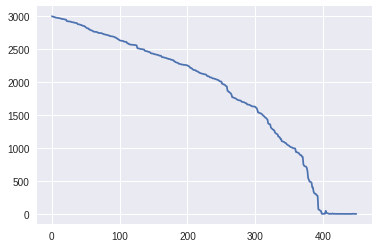

In [49]:
plt.plot(difDegree)

In [ ]:
difBetweetness = analizar_centralidad(G,450,False)

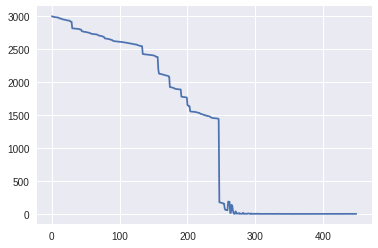

In [51]:

plt.plot(difBetweetness)

Teníamos la idea de que en pocos pasos las comunidades iban a quedar bien separadas pensando que había unos muy pocos autores que centralizaban la importancia de las coautorias, pero como podemos ver en los gráficos se necesitan eliminar alrededor del %13 de autores para que no se pueda identificar una componente conexa gigante principal. Luego de eliminar alrededor de 400 autores, la primer y segunda componente conexa más grande tienen la misma dimensión.

Tambien podemos identificar como mediante el betweetness converge más rápido a romper el grafo de colaboraciones. Con esta métrica necesitamos alrededor del %8 de los autores para separar en comunidades indistinguibles.

In [52]:
print(difBetweetness)

[  3.00000000e+03   2.99500000e+03   2.99400000e+03   2.98900000e+03
   2.98800000e+03   2.98700000e+03   2.98500000e+03   2.98300000e+03
   2.98100000e+03   2.98000000e+03   2.97900000e+03   2.96800000e+03
   2.96700000e+03   2.96500000e+03   2.96300000e+03   2.95500000e+03
   2.95300000e+03   2.95100000e+03   2.95000000e+03   2.94700000e+03
   2.94500000e+03   2.94100000e+03   2.94000000e+03   2.93700000e+03
   2.93500000e+03   2.93400000e+03   2.93300000e+03   2.92300000e+03
   2.91800000e+03   2.91600000e+03   2.81700000e+03   2.81600000e+03
   2.81500000e+03   2.81400000e+03   2.81200000e+03   2.81100000e+03
   2.81000000e+03   2.80900000e+03   2.80800000e+03   2.80700000e+03
   2.80600000e+03   2.80000000e+03   2.79900000e+03   2.79800000e+03
   2.77400000e+03   2.77200000e+03   2.76900000e+03   2.76500000e+03
   2.76300000e+03   2.76200000e+03   2.76100000e+03   2.75900000e+03
   2.75600000e+03   2.75300000e+03   2.75200000e+03   2.74900000e+03
   2.74300000e+03   2.74200000e+03

[  3.00000000e+03   2.99500000e+03   2.99400000e+03   2.98900000e+03
   2.98800000e+03   2.98700000e+03   2.98500000e+03   2.98300000e+03
   2.98100000e+03   2.98000000e+03   2.97900000e+03   2.96800000e+03
   2.96700000e+03   2.96500000e+03   2.96300000e+03   2.95500000e+03
   2.95300000e+03   2.95100000e+03   2.95000000e+03   2.94700000e+03
   2.94500000e+03   2.94100000e+03   2.94000000e+03   2.93700000e+03
   2.93500000e+03   2.93400000e+03   2.93300000e+03   2.92300000e+03
   2.91800000e+03   2.91600000e+03   2.81700000e+03   2.81600000e+03
   2.81500000e+03   2.81400000e+03   2.81200000e+03   2.81100000e+03
   2.81000000e+03   2.80900000e+03   2.80800000e+03   2.80700000e+03
   2.80600000e+03   2.80000000e+03   2.79900000e+03   2.79800000e+03
   2.77400000e+03   2.77200000e+03   2.76900000e+03   2.76500000e+03
   2.76300000e+03   2.76200000e+03   2.76100000e+03   2.75900000e+03
   2.75600000e+03   2.75300000e+03   2.75200000e+03   2.74900000e+03
   2.74300000e+03   2.74200000e+03   2.73500000e+03   2.73200000e+03
   2.73100000e+03   2.73000000e+03   2.72900000e+03   2.72800000e+03
   2.72600000e+03   2.72500000e+03   2.72400000e+03   2.71900000e+03
   2.71500000e+03   2.70700000e+03   2.70500000e+03   2.70400000e+03
   2.70200000e+03   2.70100000e+03   2.69500000e+03   2.69200000e+03
   2.69000000e+03   2.68200000e+03   2.66400000e+03   2.66300000e+03
   2.66100000e+03   2.65900000e+03   2.65800000e+03   2.65600000e+03
   2.65400000e+03   2.65100000e+03   2.64600000e+03   2.64500000e+03
   2.64000000e+03   2.63900000e+03   2.62700000e+03   2.62400000e+03
   2.62200000e+03   2.62000000e+03   2.61900000e+03   2.61800000e+03
   2.61700000e+03   2.61600000e+03   2.61500000e+03   2.61400000e+03
   2.61300000e+03   2.61200000e+03   2.61100000e+03   2.60900000e+03
   2.60700000e+03   2.60600000e+03   2.60500000e+03   2.60200000e+03
   2.60100000e+03   2.60000000e+03   2.59900000e+03   2.59500000e+03
   2.59400000e+03   2.59200000e+03   2.59100000e+03   2.58700000e+03
   2.58500000e+03   2.58400000e+03   2.58300000e+03   2.58200000e+03
   2.57800000e+03   2.57500000e+03   2.57400000e+03   2.57300000e+03
   2.57200000e+03   2.57000000e+03   2.56400000e+03   2.56100000e+03
   2.55700000e+03   2.55300000e+03   2.55000000e+03   2.54900000e+03
   2.54800000e+03   2.54500000e+03   2.42700000e+03   2.42500000e+03
   2.42300000e+03   2.42200000e+03   2.42100000e+03   2.42000000e+03
   2.41800000e+03   2.41700000e+03   2.41600000e+03   2.41500000e+03
   2.41400000e+03   2.41200000e+03   2.41100000e+03   2.41000000e+03
   2.40900000e+03   2.40700000e+03   2.40400000e+03   2.40000000e+03
   2.39900000e+03   2.38700000e+03   2.38600000e+03   2.38400000e+03
   2.38100000e+03   2.18500000e+03   2.12900000e+03   2.12600000e+03
   2.12500000e+03   2.12400000e+03   2.11900000e+03   2.11600000e+03
   2.11500000e+03   2.11200000e+03   2.10800000e+03   2.10400000e+03
   2.10200000e+03   2.10000000e+03   2.09900000e+03   2.09600000e+03
   2.08800000e+03   2.08400000e+03   1.92500000e+03   1.92300000e+03
   1.92200000e+03   1.91900000e+03   1.91700000e+03   1.91200000e+03
   1.91000000e+03   1.90100000e+03   1.90000000e+03   1.89600000e+03
   1.89500000e+03   1.89400000e+03   1.89200000e+03   1.89100000e+03
   1.89000000e+03   1.88900000e+03   1.88800000e+03   1.77900000e+03
   1.77800000e+03   1.77600000e+03   1.77400000e+03   1.77300000e+03
   1.77200000e+03   1.77000000e+03   1.76900000e+03   1.76600000e+03
   1.65000000e+03   1.64500000e+03   1.63600000e+03   1.63500000e+03
   1.55700000e+03   1.55400000e+03   1.55300000e+03   1.55200000e+03
   1.55100000e+03   1.55000000e+03   1.54800000e+03   1.54700000e+03
   1.54600000e+03   1.54500000e+03   1.54000000e+03   1.53800000e+03
   1.53500000e+03   1.53400000e+03   1.53100000e+03   1.51800000e+03
   1.51700000e+03   1.51600000e+03   1.51100000e+03   1.50900000e+03
   1.50300000e+03   1.50100000e+03   1.50000000e+03   1.49200000e+03
   1.49000000e+03   1.48900000e+03   1.48400000e+03   1.48300000e+03
   1.48200000e+03   1.47800000e+03   1.46900000e+03   1.46200000e+03
   1.45800000e+03   1.45700000e+03   1.45500000e+03   1.45300000e+03
   1.45200000e+03   1.45100000e+03   1.45000000e+03   1.44900000e+03
   1.44800000e+03   1.44700000e+03   1.43900000e+03   1.75000000e+02
   1.74000000e+02   1.73000000e+02   1.67000000e+02   1.65000000e+02
   1.64000000e+02   1.57000000e+02   1.56000000e+02   7.60000000e+01
   6.10000000e+01   6.00000000e+01   5.80000000e+01   5.50000000e+01
   1.87000000e+02   1.85000000e+02   1.84000000e+02   1.60000000e+01
   1.40000000e+01   1.38000000e+02   1.26000000e+02   5.20000000e+01
   1.00000000e+01   0.00000000e+00   8.00000000e+00   3.90000000e+01
   4.00000000e+00   9.00000000e+00   4.00000000e+00   8.00000000e+00
   1.30000000e+01   0.00000000e+00   6.00000000e+00   4.00000000e+00
   1.00000000e+00   3.00000000e+00   1.80000000e+01   3.00000000e+00
   0.00000000e+00   5.00000000e+00   2.00000000e+00   1.00000000e+00
   1.00000000e+00   7.00000000e+00   7.00000000e+00   5.00000000e+00
   1.00000000e+00   0.00000000e+00   8.00000000e+00   1.00000000e+00
   1.00000000e+00   0.00000000e+00   3.00000000e+00   2.00000000e+00
   0.00000000e+00   4.00000000e+00   1.00000000e+00   1.00000000e+00
   5.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   1.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   1.00000000e+00   0.00000000e+00   2.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   1.00000000e+00   0.00000000e+00   2.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   3.00000000e+00   0.00000000e+00   2.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   2.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   1.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00]
